# Чуть-чуть математики

Теперь давайте попробуем написать функцию. Например, чтобы приближённо считала синус. Для небольших $x$:

$$\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots + R(x) =
\sum_{n=0}^N \left(\frac{x^{2n + 1}}{(2n + 1)!} -  \frac{x^{2n+2}}{(2n+2)!}\right) + R(x),$$

причём $R(x) \xrightarrow[N \rightarrow \infty]{} 0$.

Это частичная сумма т.н. ряда Тейлора:

$$ f(x) = f(a)+\sum_{k=1}^\infty {f^{(k)} (a) \over k!} (x - a)^k. $$

In [2]:
import math

iterations = 20

def my_cos(x):
    """
    """
    partial_sum = 0
    x_pow = 1
    for n in range(iterations):
        # В цикле постепенно считаем степень и факториал
        minus = x_pow * x ** 2 / (2 * n + 1) / (2 * n + 2)
        partial_sum += x_pow - minus
        x_pow = minus * x ** 2 / (2 * n + 3) / (2 * n + 4)
    
    return partial_sum

print(my_cos(0.125))
print(math.cos(0.125))

0.9921976592874601
0.992197667229329


выходит у нас немного неточно, но зато...

... Зато наша функция умеет считать синус комплексного аргумента, легко достигающий пяти и более в мирное время. Мнимая единица ($i$) в Питоне обозначется, как `j`.

Стандартная библиотека тоже умеет, **и поточнее**.

In [5]:
%matplotlib inline

import math
import cmath
import matplotlib.pyplot as plt
import numpy as np

complex_angle = cmath.acos(5)
print('"Угол", на котором конус достигает пяти:', complex_angle)

print("Достигает ли пяти наш конус?", my_cos(complex_angle))
print("А библиотечный?", cmath.cos(complex_angle))

"Угол", на котором конус достигает пяти: -2.2924316695611777j
Достигает ли пяти наш конус? (5.387641243098284+0j)
А библиотечный? (5+0j)


А какое самое слабое место у нашего синуса?

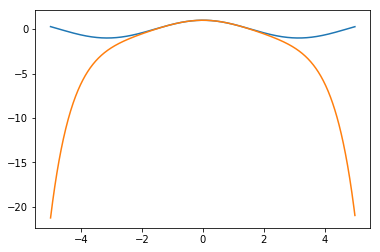

In [6]:
angles = np.r_[-5.0:5.0:0.01]
plt.plot(angles, np.cos(angles))
plt.plot(angles, np.vectorize(my_cos)(angles))
plt.show()

# Задание

Реализовать вычисление частичной суммы [ряда Тейлора для одной из элементарных функций](http://ru.math.wikia.com/wiki/%D0%A0%D1%8F%D0%B4_%D0%A2%D0%B5%D0%B9%D0%BB%D0%BE%D1%80%D0%B0) (кроме синуса 😸), аналогичным образом «испытать» получившиеся функции. 